In [1]:
!pip install statsmodels

In [3]:
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('simple_example.csv')
data

,x,y
0,10,7.70
1,10,9.87
2,11,11.18
3,12,10.43
4,13,12.36
5,14,14.15
6,15,15.73
7,16,16.40
8,17,18.86
9,18,16.13


In [5]:
features, labels = ['x'], ['y']
Y = data[labels]
X = sm.add_constant(data[features])
X, Y

(    const   x
 0     1.0  10
 1     1.0  10
 2     1.0  11
 3     1.0  12
 4     1.0  13
 5     1.0  14
 6     1.0  15
 7     1.0  16
 8     1.0  17
 9     1.0  18
 10    1.0  19
 11    1.0  20
 12    1.0  21
 13    1.0  22
 14    1.0  23
 15    1.0  24
 16    1.0  25
 17    1.0  26
 18    1.0  27
 19    1.0  28,
         y
 0    7.70
 1    9.87
 2   11.18
 3   10.43
 4   12.36
 5   14.15
 6   15.73
 7   16.40
 8   18.86
 9   16.13
 10  18.21
 11  18.37
 12  22.61
 13  19.83
 14  22.67
 15  22.70
 16  25.16
 17  25.55
 18  28.21
 19  28.12)

In [6]:
model = sm.OLS(Y, X)
re = model.fit()
re

In [7]:
print(re.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     460.5
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           2.85e-14
Time:                        01:54:21   Log-Likelihood:                -31.374
No. Observations:                  20   AIC:                             66.75
Df Residuals:                      18   BIC:                             68.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9495      0.934     -1.017      0.3

In [8]:
print('Test the hypothesis that the coefficient of x is equal to 0:')
print(re.f_test('x=0'))

Test the hypothesis that the coefficient of x is equal to 0:
<F test: F=460.4584822034311, p=2.848465414495694e-14, df_denom=18, df_num=1>


In [9]:
print('Check the assumption that the coefficient of const is equal to 0:')
print(re.f_test('const=0'))

Check the assumption that the coefficient of const is equal to 0:
<F test: F=1.0335579388583023, p=0.3227956400831507, df_denom=18, df_num=1>


In [10]:
print('Check that the assumptions that the coefficient of x is equal to 1 and the coefficient of const is equal to 0 are both true:')
print(re.f_test(['x=1', 'const=0']))

Check that the assumptions that the coefficient of x is equal to 1 and the coefficient of const is equal to 0 are both true:
<F test: F=0.9965463122444933, p=0.388626797606395, df_denom=18, df_num=2>


In [11]:
model_new = sm.OLS(Y, data[features])
re_new = model_new.fit()
print(re_new.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              4876.
Date:                Sat, 20 Jul 2024   Prob (F-statistic):                    2.26e-24
Time:                        01:54:29   Log-Likelihood:                         -31.933
No. Observations:                  20   AIC:                                      65.87
Df Residuals:                      19   BIC:                                      66.86
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

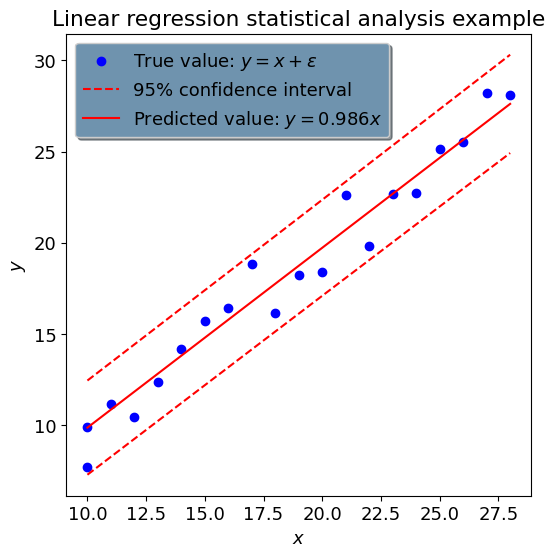

In [12]:
# Calculate the standard deviation of the prediction results, predict the lower bound, and predict the upper bound
pre_std, pre_low, pre_up = wls_prediction_std(re_new, alpha=0.05)

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})

# Create a graphics box
fig = plt.figure(figsize=(6, 6), dpi=100)

# Draw only one picture in the graphics box
ax = fig.add_subplot(111)
ax.set_title('Linear regression statistical analysis example')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Draw a dot graph, using blue dots to represent the original data
ax.scatter(data[features], data[labels], color='b', label='True value: $y = x + \epsilon$')

# Draw a line graph, using red dotted lines to represent the 95% confidence interval
ax.plot(data[features], pre_up, 'r--', label='95% confidence interval')
ax.plot(data[features], re_new.predict(data[features]), color='r',
        label=f'Predicted value: $y = {re_new.params[features].item():.3f}x$')
ax.plot(data[features], pre_low, 'r--')

# Set the style of the legend Linear regression statistical analysis example
legend = plt.legend(shadow=True)
legend.get_frame().set_facecolor('#6F93AE')
plt.savefig('linear-stat.png', dpi=200)
plt.show()